# SRCNN

## Training the model

Import our helper classes and functions

In [1]:
from data_loader import MultipleDataLoader
from train import SRGANTrainer, SRCNNTrainer, Losses, predict_and_show

import tensorflow as tf

## Define the dataloader

In [2]:
lr_channels = 5
data_dir = "DataTFRecords/train/"
repeat = True
augment = True
shuffle =  True
batch_size = 6

loader = MultipleDataLoader(data_dir, batch_size, repeat, augment, shuffle, lr_channels)

## Define training parameters and model structure for the trainer

In [31]:
srcnn_training_hyperparams = {
    'losses': [Losses.cMSE, Losses.SSIM],
    'losses_weights': [5.0, 1.0],
    'epochs': 30,
    'optimizer': tf.keras.optimizers.Adam(0.0001),
    'verbose': True,
    #'model_path': "Model/SRCNN/10.hdf5" # reloading model
}

srcnn_model_parameters = {
    'channel_dim': lr_channels,
    'number_residual_block': 8,
    'batch_norm': True,
}

trainer = SRCNNTrainer(srcnn_training_hyperparams, srcnn_model_parameters)
trainer.model.summary()

Creating new model, saving at "Model/SRCNN/" 
Params:
{'losses': [<function Losses.cMSE at 0x7f312f057c80>, <function Losses.SSIM at 0x7f312f057f28>], 'losses_weights': [5.0, 1.0], 'epochs': 30, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f2cec6969e8>, 'verbose': True}
{'channel_dim': 5, 'number_residual_block': 8, 'batch_norm': True}
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 128, 128, 5) 0                                            
__________________________________________________________________________________________________
conv2d_479 (Conv2D)             (None, 128, 128, 32) 1472        input_14[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_285 (Leak

## Train the model on the data using the loader

In [32]:
trainer.fit(loader)

Starting model training
Epoch 1/30
194/193 [==============================] - 188s 971ms/step - loss: 0.0898 - cPSNR_metric: 34.0389
Epoch 2/30
194/193 [==============================] - 163s 840ms/step - loss: 0.0378 - cPSNR_metric: 37.7259
Epoch 3/30
194/193 [==============================] - 164s 844ms/step - loss: 0.0342 - cPSNR_metric: 38.1936
Epoch 4/30
194/193 [==============================] - 163s 838ms/step - loss: 0.0277 - cPSNR_metric: 39.3256
Epoch 5/30
194/193 [==============================] - 163s 840ms/step - loss: 0.0257 - cPSNR_metric: 40.0642
Epoch 6/30
194/193 [==============================] - 163s 840ms/step - loss: 0.0231 - cPSNR_metric: 40.3745
Epoch 7/30
194/193 [==============================] - 162s 835ms/step - loss: 0.0273 - cPSNR_metric: 39.5437
Epoch 8/30
193/193 [============================>.] - ETA: 0s - loss: 0.0254 - cPSNR_metric: 40.0746
Epoch 00008: ReduceLROnPlateau reducing learning rate to 7.999999797903001e-05.
194/193 [=======================

## Compute score using script

In [1]:
! python score.py --model_path Model/SRCNN/30.hdf5 --data_path DataTFRecords/train/ --num_channel 5

Super resolving with Model/SRCNN/30.hdf5
score: 1.0348698992257703


### Compute some predictions

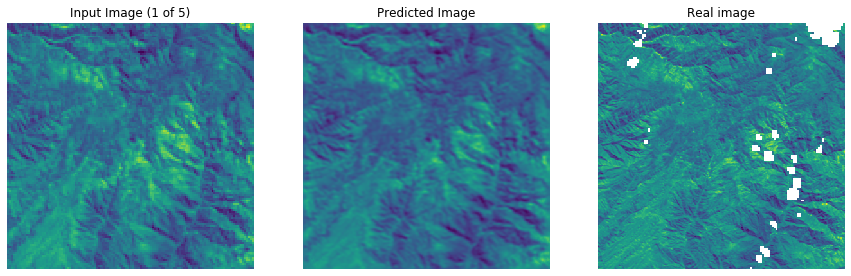

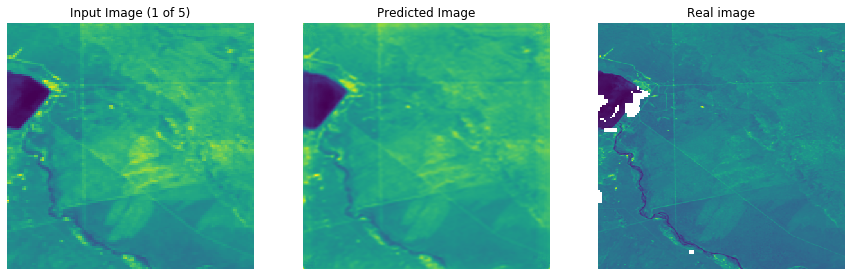

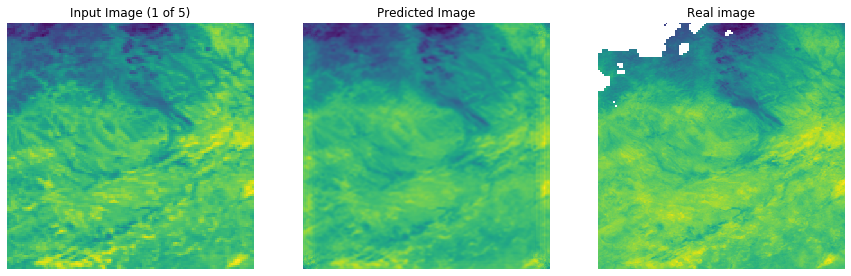

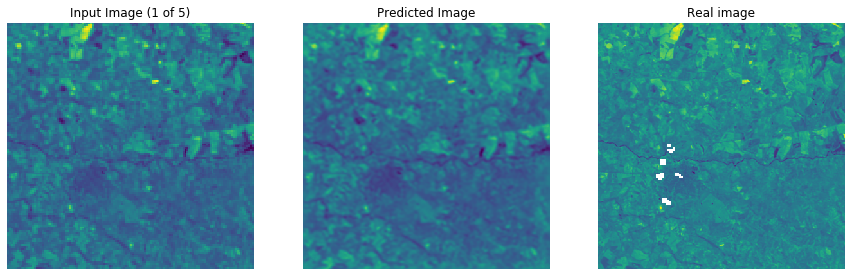

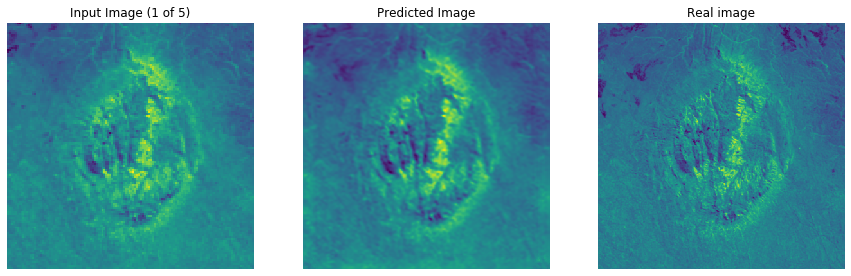

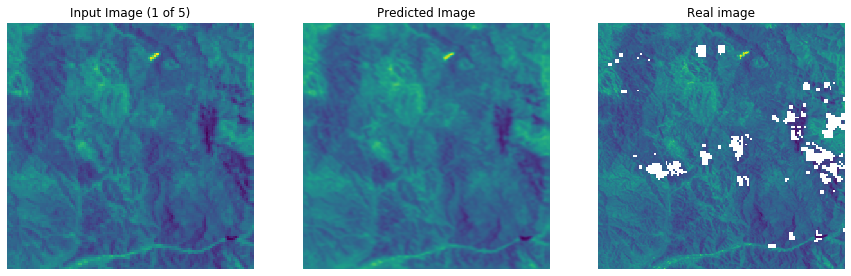

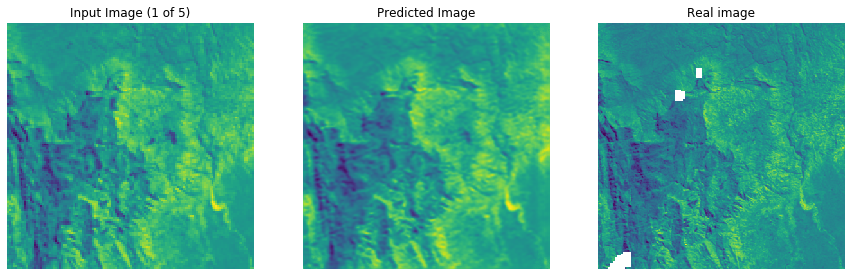

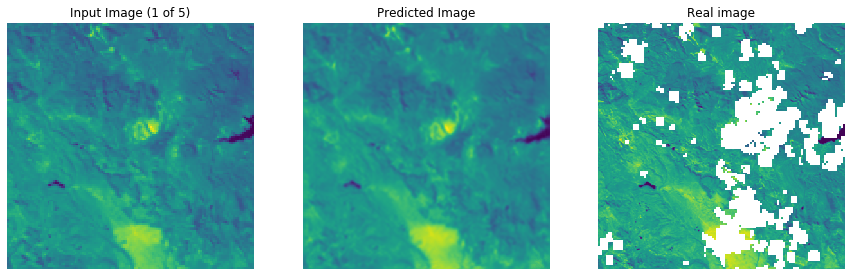

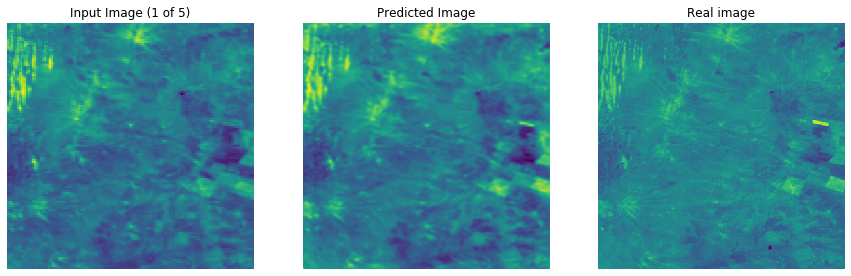

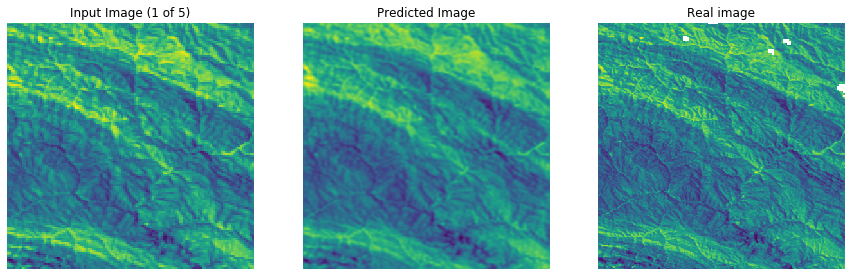

In [9]:
lr_channels = 5
data_dir = "DataTFRecords/train/"
repeat = False
augment = False
shuffle =  True
batch_size = 1

loader_train = MultipleDataLoader(data_dir, batch_size, repeat, augment, shuffle, lr_channels)

for lrs, hr in loader_train().take(5):
    predict_and_show(trainer.model, lrs, hr, max_lr=5)
    
test_dir = "DataTFRecords/test/"
loader_test = MultipleDataLoader(test_dir, batch_size, repeat, augment, shuffle, lr_channels)
    
for lrs, hr in loader().take(5):
    predict_and_show(trainer.model, lrs, hr, max_lr=5)

# Train SRGAN

In [5]:
loader = MultipleDataLoader("DataTFRecords/train/", 6, False, True, True, 5)

In [3]:
srgan_training_hyperparams = {
    'losses': [Losses.SSIM],
    'losses_weights': [1.0],
    'epochs': 10,
    'optimizer_gen': tf.keras.optimizers.SGD(1e-06, momentum = 0.9),
    'optimizer_discr': tf.keras.optimizers.Adam(0.0001),
    'verbose': True,
    'pretrained_generator_path' : "Model/SRCNN/30.hdf5"
}

generator_model_parameters = {
    'channel_dim': 5,
    'number_residual_block': 8,
    'batch_norm': True,
}

trainer = SRGANTrainer(srgan_training_hyperparams, generator_model_parameters)

Creating new model, saving at "Model/SRGAN/" 
Loading pre-trained generator from Model/SRCNN/30.hdf5


In [20]:
trainer.fit(loader)

Starting SRGAN model training
Saving model
epoch: 0 current losses: (gen / disc) tf.Tensor(2.3175812, shape=(), dtype=float32) / 0.39801009740584936 cPSNR: tf.Tensor(42.978416, shape=(), dtype=float32)
Saving model
epoch: 1 current losses: (gen / disc) tf.Tensor(2.4773376, shape=(), dtype=float32) / 0.26794302524664465 cPSNR: tf.Tensor(42.988, shape=(), dtype=float32)
Saving model
epoch: 2 current losses: (gen / disc) tf.Tensor(2.596454, shape=(), dtype=float32) / 0.16577154306265024 cPSNR: tf.Tensor(42.970917, shape=(), dtype=float32)
Saving model
epoch: 3 current losses: (gen / disc) tf.Tensor(2.649594, shape=(), dtype=float32) / 0.10316678560697115 cPSNR: tf.Tensor(43.02995, shape=(), dtype=float32)
Saving model
epoch: 4 current losses: (gen / disc) tf.Tensor(2.673467, shape=(), dtype=float32) / 0.07580614823561449 cPSNR: tf.Tensor(43.049217, shape=(), dtype=float32)
Saving model
epoch: 5 current losses: (gen / disc) tf.Tensor(2.6928642, shape=(), dtype=float32) / 0.0540070998363005

In [1]:
! python score.py --model_path Model/SRGAN/9.hdf5 --data_path DataTFRecords/train/ --num_channel 5 --gan

Super resolving with Model/SRGAN/9.hdf5
score: 1.007562716748265


# Training longer 

In [1]:
from data_loader import MultipleDataLoader
from train import SRGANTrainer, SRCNNTrainer, Losses, predict_and_show

import tensorflow as tf
loader = MultipleDataLoader("DataTFRecords/train/", 5, False, True, True, 9)

srgan_training_hyperparams = {
    'losses': [Losses.SSIM],
    'losses_weights': [1.0],
    'epochs': 150,
    'optimizer_gen': tf.keras.optimizers.SGD(2e-06, momentum = 0.8),
    'lr_gen_decay': 0.95,
    'optimizer_discr': tf.keras.optimizers.Adam(0.0001),
    'invert_prob': 0.08,
    'verbose': True,
    'pretrained_generator_path' : "Model/SRCNN/06.hdf5"
}

generator_model_parameters = {
    'channel_dim': 9,
    'number_residual_block': 11,
    'batch_norm': True,
}

trainer = SRGANTrainer(srgan_training_hyperparams, generator_model_parameters)

Creating new model, saving at "Model/SRGAN/" 
Loading pre-trained generator from Model/SRCNN/06.hdf5


In [ ]:
trainer.fit(loader)

Starting SRGAN model training


W0726 00:12:16.586874 139701935908672 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1220: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Saving model
epoch: 0 current losses: (gen / disc) tf.Tensor(2.5883842, shape=(), dtype=float32) / 0.42806302836012944 cPSNR: tf.Tensor(41.383495, shape=(), dtype=float32)
